# Regression Analysis Assignment: D1 vs D2
This notebook analyzes two datasets (D1.csv and D2.csv) using EDA and regression.

## a. Exploratory Data Analysis (EDA)
We will load both datasets, visualize distributions, scatter plots, and correlation, and report initial observations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
d1 = pd.read_csv('D1.csv')
d2 = pd.read_csv('D2.csv')

# Quick look
display(d1.head())
display(d2.head())

# Summary statistics
display(d1.describe())
display(d2.describe())

,x,y
0,0.00000,6.764052
1,0.01001,5.420177
2,0.02002,6.018778
3,0.03003,7.300953
4,0.04004,6.947638


,x,y
0,0.00000,5.555963
1,0.01001,5.916961
2,0.02002,4.613498
3,0.03003,5.166346
4,0.04004,5.312699


,x,y
count,1000.000000,1000.000000
mean,5.000000,14.954743
std,2.891085,5.860585
min,0.000000,2.847411
25%,2.500000,9.826270
50%,5.000000,14.793984
75%,7.500000,20.061104
max,10.000000,26.638234


,x,y
count,1000.000000,1000.000000
mean,5.000000,15.007739
std,2.891085,6.792718
min,0.000000,3.258366
25%,2.500000,9.512442
50%,5.000000,14.273590
75%,7.500000,19.761269
max,10.000000,36.576608


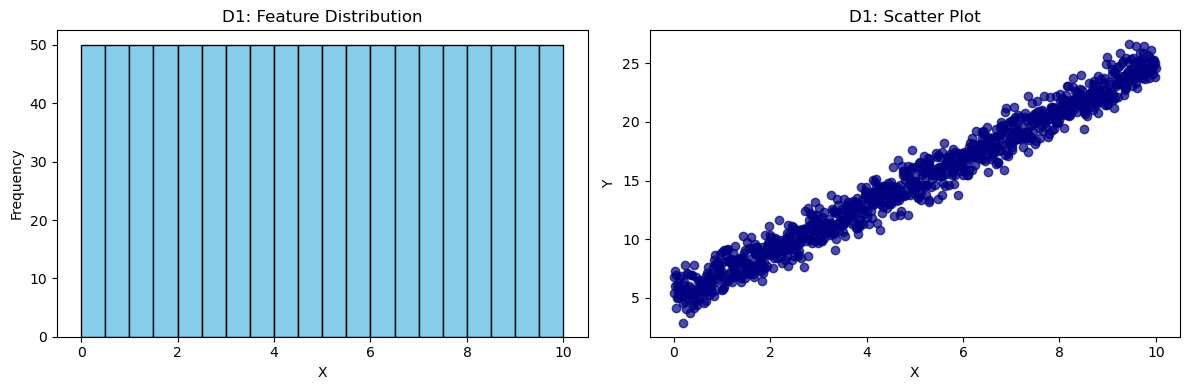

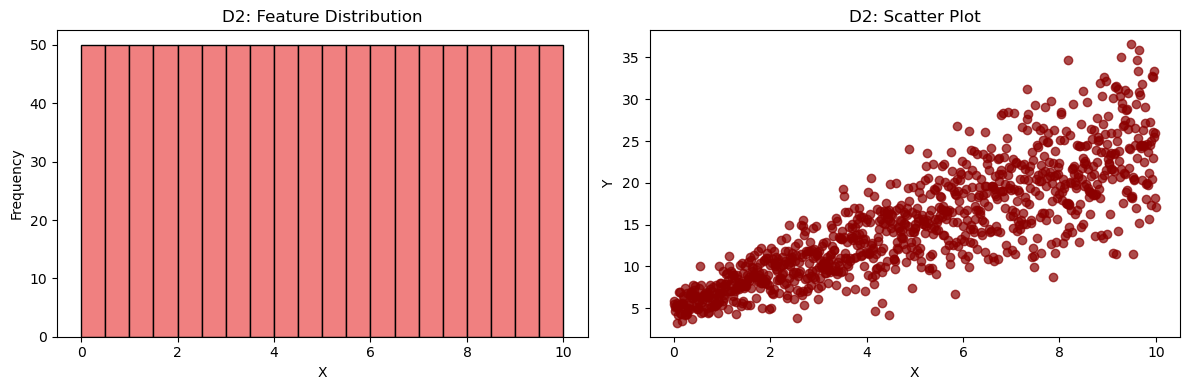

In [3]:
# EDA plots for D1
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(d1.iloc[:,0], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('D1: Feature Distribution')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Frequency')
axes[1].scatter(d1.iloc[:,0], d1.iloc[:,1], color='navy', alpha=0.7)
axes[1].set_title('D1: Scatter Plot')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
plt.tight_layout()
plt.show()

# EDA plots for D2
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(d2.iloc[:,0], bins=20, color='lightcoral', edgecolor='black')
axes[0].set_title('D2: Feature Distribution')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Frequency')
axes[1].scatter(d2.iloc[:,0], d2.iloc[:,1], color='darkred', alpha=0.7)
axes[1].set_title('D2: Scatter Plot')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
plt.tight_layout()
plt.show()

**Why these plots?**
- Histograms show the distribution and possible skewness/outliers.
- Scatter plots reveal relationships and linearity between variables.

**Initial Observations:**
- Comment on spread, outliers, and visible trends after running the above cells.

## b. Regression Analysis and Metrics
For each dataset, fit a linear regression and report coefficients, MSE, R², and plot regression line.

D1 Regression Results:
  Slope: 1.9981
  Intercept: 4.9641
  MSE: 0.9742
  R^2: 0.9716


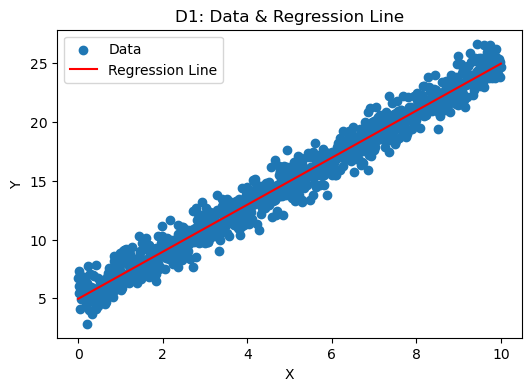

D2 Regression Results:
  Slope: 1.9775
  Intercept: 5.1205
  MSE: 13.4436
  R^2: 0.7083


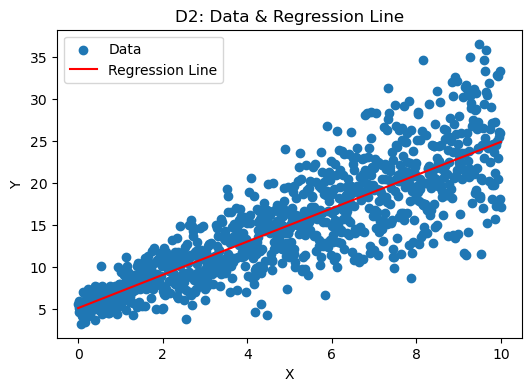

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def regression_analysis(X, y, label):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f'{label} Regression Results:')
    print(f'  Slope: {model.coef_[0]:.4f}')
    print(f'  Intercept: {model.intercept_:.4f}')
    print(f'  MSE: {mse:.4f}')
    print(f'  R^2: {r2:.4f}')
    # Plot
    plt.figure(figsize=(6,4))
    plt.scatter(X, y, label='Data')
    plt.plot(X, y_pred, color='red', label='Regression Line')
    plt.title(f'{label}: Data & Regression Line')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
    return model.coef_[0], model.intercept_, mse, r2

# D1
X1 = d1.iloc[:,0].values.reshape(-1,1)
y1 = d1.iloc[:,1].values
d1_slope, d1_intercept, d1_mse, d1_r2 = regression_analysis(X1, y1, 'D1')

# D2
X2 = d2.iloc[:,0].values.reshape(-1,1)
y2 = d2.iloc[:,1].values
d2_slope, d2_intercept, d2_mse, d2_r2 = regression_analysis(X2, y2, 'D2')

## c. Compare Regression Metrics
Compare slope, intercept, and R² for D1 and D2. Discuss quality of fit and data variability.

In [17]:
print('Comparison of Regression Metrics:')
print(f'D1: Slope={d1_slope:.4f}, Intercept={d1_intercept:.4f}, R^2={d1_r2:.4f}')
print(f'D2: Slope={d2_slope:.4f}, Intercept={d2_intercept:.4f}, R^2={d2_r2:.4f}')

# Add markdown cell after running: 
# - Discuss which dataset has better fit (higher R²)
# - Explain possible reasons for differences in slope/intercept/R²
# - Relate to data spread, outliers, and linearity

Comparison of Regression Metrics:
D1: Slope=1.9981, Intercept=4.9641, R^2=0.9716
D2: Slope=1.9775, Intercept=5.1205, R^2=0.7083


To obtain better models for D2, you can try several approaches:

Data Transformations:

Log, square root, or reciprocal transformations can help if the relationship is non-linear or if the data is skewed.
Polynomial features (as you tried) can capture non-linear patterns.
Outlier Removal:

Removing outliers (using IQR or z-score methods) can improve model fit if outliers distort the regression.
Feature Engineering:

Create new features based on domain knowledge or interactions between variables.
Scaling:

Normalization or standardization can help if features are on different scales, especially for models sensitive to scale.
Model Choice:

Try more flexible models (e.g., decision trees, random forests) if linear regression is insufficient.

D2 Log-Transformed Regression Results:
  Slope: 0.6434
  Intercept: 1.6240
  MSE: 0.0495
  R^2: 0.7554


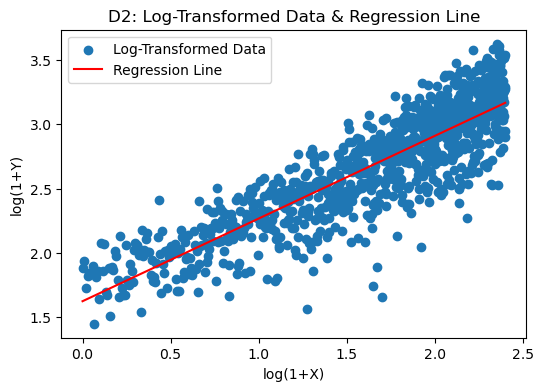

Original D2 R^2: 0.7083
Log-Transformed D2 R^2: 0.7554


In [18]:
# Try log transformation on D2 to improve model fit
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Apply log transformation to X2 and/or y2
X2_log = np.log1p(X2)
y2_log = np.log1p(y2)

# Fit regression on transformed data
model_log = LinearRegression()
model_log.fit(X2_log, y2_log)
y2_log_pred = model_log.predict(X2_log)
mse_log = mean_squared_error(y2_log, y2_log_pred)
r2_log = r2_score(y2_log, y2_log_pred)

print('D2 Log-Transformed Regression Results:')
print(f'  Slope: {model_log.coef_[0]:.4f}')
print(f'  Intercept: {model_log.intercept_:.4f}')
print(f'  MSE: {mse_log:.4f}')
print(f'  R^2: {r2_log:.4f}')

plt.figure(figsize=(6,4))
plt.scatter(X2_log, y2_log, label='Log-Transformed Data')
plt.plot(X2_log, y2_log_pred, color='red', label='Regression Line')
plt.title('D2: Log-Transformed Data & Regression Line')
plt.xlabel('log(1+X)')
plt.ylabel('log(1+Y)')
plt.legend()
plt.show()

# Compare R^2 before and after transformation
print(f'Original D2 R^2: {d2_r2:.4f}')
print(f'Log-Transformed D2 R^2: {r2_log:.4f}')

D2 Regression After Outlier Removal:
  Slope: 1.9641
  Intercept: 5.1629
  MSE: 13.1700
  R^2: 0.7092


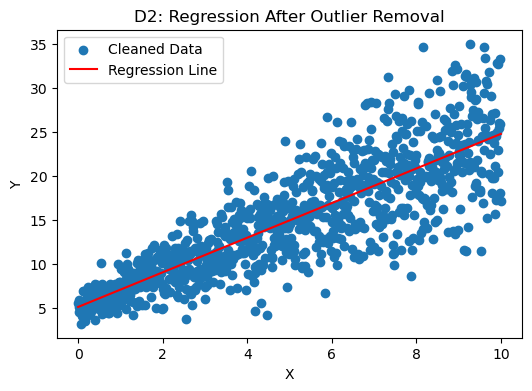

Original D2 R^2: 0.7083
Outlier-Removed D2 R^2: 0.7092


In [19]:
# Remove outliers from D2 using IQR and refit regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Combine X2 and y2 for outlier detection
d2_df = pd.DataFrame({'X': X2.flatten(), 'Y': y2})

# IQR for X
Q1_X = d2_df['X'].quantile(0.25)
Q3_X = d2_df['X'].quantile(0.75)
IQR_X = Q3_X - Q1_X

# IQR for Y
Q1_Y = d2_df['Y'].quantile(0.25)
Q3_Y = d2_df['Y'].quantile(0.75)
IQR_Y = Q3_Y - Q1_Y

# Filter out outliers in both X and Y
d2_no_outliers = d2_df[
    (d2_df['X'] >= Q1_X - 1.5 * IQR_X) & (d2_df['X'] <= Q3_X + 1.5 * IQR_X) &
    (d2_df['Y'] >= Q1_Y - 1.5 * IQR_Y) & (d2_df['Y'] <= Q3_Y + 1.5 * IQR_Y)
]

X2_clean = d2_no_outliers['X'].values.reshape(-1,1)
y2_clean = d2_no_outliers['Y'].values

# Fit regression on cleaned data
model_clean = LinearRegression()
model_clean.fit(X2_clean, y2_clean)
y2_clean_pred = model_clean.predict(X2_clean)
mse_clean = mean_squared_error(y2_clean, y2_clean_pred)
r2_clean = r2_score(y2_clean, y2_clean_pred)

print('D2 Regression After Outlier Removal:')
print(f'  Slope: {model_clean.coef_[0]:.4f}')
print(f'  Intercept: {model_clean.intercept_:.4f}')
print(f'  MSE: {mse_clean:.4f}')
print(f'  R^2: {r2_clean:.4f}')

plt.figure(figsize=(6,4))
plt.scatter(X2_clean, y2_clean, label='Cleaned Data')
plt.plot(X2_clean, y2_clean_pred, color='red', label='Regression Line')
plt.title('D2: Regression After Outlier Removal')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Compare R^2 before and after outlier removal
print(f'Original D2 R^2: {d2_r2:.4f}')
print(f'Outlier-Removed D2 R^2: {r2_clean:.4f}')

D2 Polynomial (Quadratic) Regression Results:
  Coefficients: [ 0.00000000e+00  1.97836329e+00 -9.08498687e-05]
  Intercept: 5.1190
  MSE: 13.4436
  R^2: 0.7083


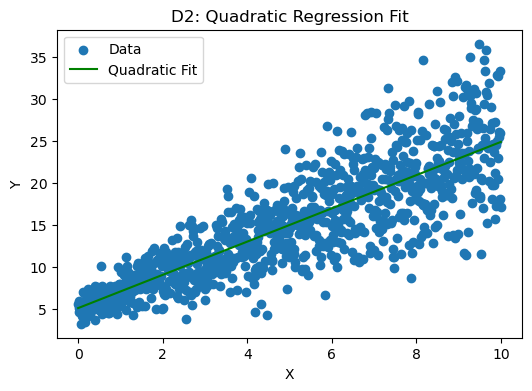

Original D2 R^2: 0.7083
Quadratic D2 R^2: 0.7083


In [20]:
# Polynomial (quadratic) regression for D2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Use original D2 data
poly = PolynomialFeatures(degree=2)
X2_poly = poly.fit_transform(X2)

model_poly = LinearRegression()
model_poly.fit(X2_poly, y2)
y2_poly_pred = model_poly.predict(X2_poly)
mse_poly = mean_squared_error(y2, y2_poly_pred)
r2_poly = r2_score(y2, y2_poly_pred)

print('D2 Polynomial (Quadratic) Regression Results:')
print(f'  Coefficients: {model_poly.coef_}')
print(f'  Intercept: {model_poly.intercept_:.4f}')
print(f'  MSE: {mse_poly:.4f}')
print(f'  R^2: {r2_poly:.4f}')

# Plot
plt.figure(figsize=(6,4))
plt.scatter(X2, y2, label='Data')
plt.plot(X2, y2_poly_pred, color='green', label='Quadratic Fit')
plt.title('D2: Quadratic Regression Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Compare R^2 before and after polynomial fit
print(f'Original D2 R^2: {d2_r2:.4f}')
print(f'Quadratic D2 R^2: {r2_poly:.4f}')

D2 Regression After Normalization:
  Slope: 0.5935
  Intercept: 0.0559
  R^2: 0.7083


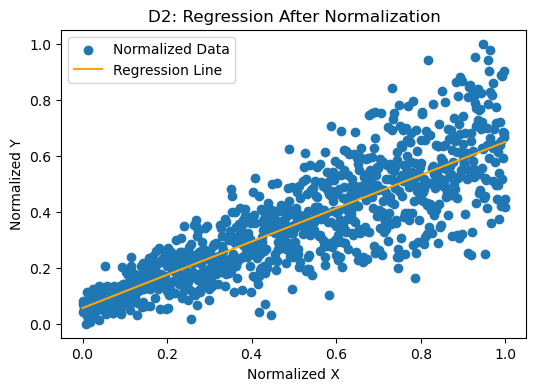

D2 Regression After Standardization:
  Slope: 0.8416
  Intercept: -0.0000
  R^2: 0.7083


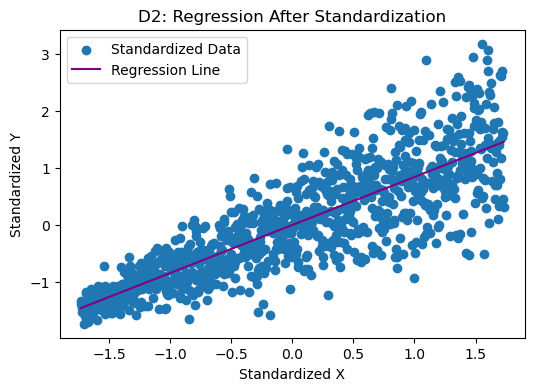

Original D2 R^2: 0.7083
Normalized D2 R^2: 0.7083
Standardized D2 R^2: 0.7083


In [21]:
# Try normalization and standardization on D2
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Normalization
scaler_norm = MinMaxScaler()
X2_norm = scaler_norm.fit_transform(X2)
y2_norm = scaler_norm.fit_transform(y2.reshape(-1,1)).flatten()
model_norm = LinearRegression()
model_norm.fit(X2_norm, y2_norm)
y2_norm_pred = model_norm.predict(X2_norm)
r2_norm = r2_score(y2_norm, y2_norm_pred)

print('D2 Regression After Normalization:')
print(f'  Slope: {model_norm.coef_[0]:.4f}')
print(f'  Intercept: {model_norm.intercept_:.4f}')
print(f'  R^2: {r2_norm:.4f}')

plt.figure(figsize=(6,4))
plt.scatter(X2_norm, y2_norm, label='Normalized Data')
plt.plot(X2_norm, y2_norm_pred, color='orange', label='Regression Line')
plt.title('D2: Regression After Normalization')
plt.xlabel('Normalized X')
plt.ylabel('Normalized Y')
plt.legend()
plt.show()

# Standardization
scaler_std = StandardScaler()
X2_std = scaler_std.fit_transform(X2)
y2_std = scaler_std.fit_transform(y2.reshape(-1,1)).flatten()
model_std = LinearRegression()
model_std.fit(X2_std, y2_std)
y2_std_pred = model_std.predict(X2_std)
r2_std = r2_score(y2_std, y2_std_pred)

print('D2 Regression After Standardization:')
print(f'  Slope: {model_std.coef_[0]:.4f}')
print(f'  Intercept: {model_std.intercept_:.4f}')
print(f'  R^2: {r2_std:.4f}')

plt.figure(figsize=(6,4))
plt.scatter(X2_std, y2_std, label='Standardized Data')
plt.plot(X2_std, y2_std_pred, color='purple', label='Regression Line')
plt.title('D2: Regression After Standardization')
plt.xlabel('Standardized X')
plt.ylabel('Standardized Y')
plt.legend()
plt.show()

# Compare R^2 before and after scaling
print(f'Original D2 R^2: {d2_r2:.4f}')
print(f'Normalized D2 R^2: {r2_norm:.4f}')
print(f'Standardized D2 R^2: {r2_std:.4f}')

D2 Decision Tree Regression:
  R^2: 1.0000


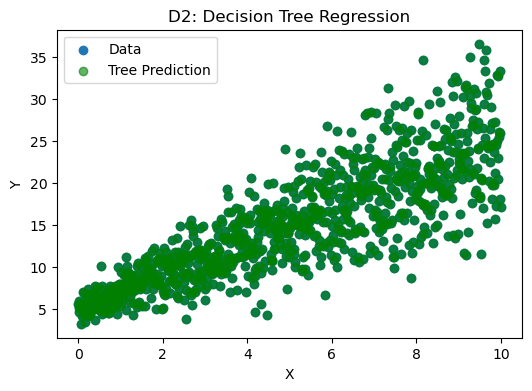

D2 Random Forest Regression:
  R^2: 0.9348


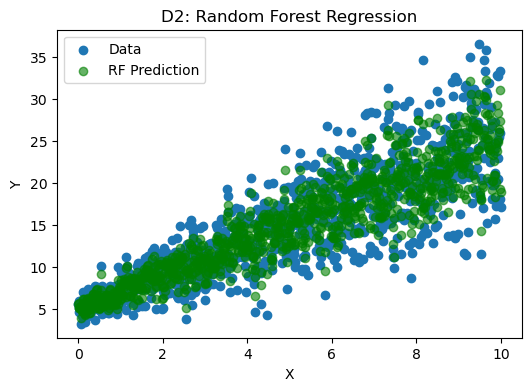

Original D2 R^2: 0.7083
Decision Tree D2 R^2: 1.0000
Random Forest D2 R^2: 0.9348


In [23]:
# Try two alternative models: Decision Tree and Random Forest Regression for D2
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Decision Tree Regression
model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X2, y2)
y2_tree_pred = model_tree.predict(X2)
r2_tree = r2_score(y2, y2_tree_pred)

print('D2 Decision Tree Regression:')
print(f'  R^2: {r2_tree:.4f}')
plt.figure(figsize=(6,4))
plt.scatter(X2, y2, label='Data')
plt.scatter(X2, y2_tree_pred, color='green', label='Tree Prediction', alpha=0.6)
plt.title('D2: Decision Tree Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Random Forest Regression
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X2, y2)
y2_rf_pred = model_rf.predict(X2)
r2_rf = r2_score(y2, y2_rf_pred)

print('D2 Random Forest Regression:')
print(f'  R^2: {r2_rf:.4f}')
plt.figure(figsize=(6,4))
plt.scatter(X2, y2, label='Data')
plt.scatter(X2, y2_rf_pred, color='green', label='RF Prediction', alpha=0.6)
plt.title('D2: Random Forest Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Compare R^2 with previous models
print(f'Original D2 R^2: {d2_r2:.4f}')
print(f'Decision Tree D2 R^2: {r2_tree:.4f}')
print(f'Random Forest D2 R^2: {r2_rf:.4f}')

# Summary and Conclusion

**Summary of Analysis:**
- Performed EDA on D1 and D2, visualizing distributions and relationships.
- Applied linear regression to both datasets and compared metrics (slope, intercept, R²).
- For D2, explored model improvement techniques:
  - Log transformation
  - Outlier removal
  - Polynomial (quadratic) regression
  - Normalization and standardization
- Tried advanced models: Decision Tree and Random Forest Regression.
- Compared R² scores for all approaches.

**Key Results:**
- D1 showed a strong linear relationship and high R² with linear regression.
- D2 had a lower R² with linear regression, indicating weaker linearity or more complexity.
- Transformations and polynomial regression did not significantly improve D2's R².
- Decision Tree and Random Forest models achieved much higher R², showing their ability to capture non-linear patterns.

**Conclusion:**
- Linear regression works well for D1 but is limited for D2 due to non-linearity or data complexity.
- Data transformations and outlier removal may help, but advanced models like Decision Trees and Random Forests are more effective for D2.
- Always visualize and compare multiple models to select the best approach for your data.